In [1]:
import numpy as np
import pandas as pd

In [2]:
#Importando produtos
product = pd.read_csv('Datasets/olist_products_dataset.csv', sep=',', encoding='iso-8859-1')

In [3]:
#Definindo colunas convenientes, assim trabalho melhor visualmente
product1 = product[['product_id', 'product_category_name']]

In [4]:
#Importando dataframe ordem de itens para utilizar dados de valores (price)
or_it = pd.read_csv('Datasets/olist_order_items_dataset.csv', sep=',', encoding='iso-8859-1')

In [5]:
#Definindo colunas convenientes do dataframe
or_it1 = or_it[['product_id', 'seller_id', 'shipping_limit_date', 'price']]

In [6]:
#Relacionando colunas
or_product = pd.merge(or_it1, product1, on='product_id', how='inner')

In [7]:
#Averiguando se existem dados duplicados
or_product1 = or_product.drop_duplicates(subset=['seller_id'])

In [8]:
#Produzindo um novo dataframe com colunas convenientes
or_product2 = pd.melt(or_product1, id_vars=['product_category_name', 'shipping_limit_date'], value_vars=['price'])

In [9]:
#Criando um novo dataframe com colunas ordenadas em ordem crescente para identificar qual é a última e primeira data
or_product3 = or_product2.sort_values(by=['product_category_name', 'shipping_limit_date'])

In [10]:
# Convertendo a coluna 'shipping_limit_date' para um objeto de data e hora
or_product3['shipping_limit_date'] = pd.to_datetime(or_product3['shipping_limit_date'])

# Definindo a data final 
data_final = pd.to_datetime('2018-12-31')

# Calculando a data inicial subtraindo 12 meses da data final
data_inicial = data_final - pd.DateOffset(months=12)

# Filtrando os dados para incluir apenas os registros dos últimos 12 meses
dados_ultimos_12_meses = or_product3[(or_product3['shipping_limit_date'] >= data_inicial) & (or_product3['shipping_limit_date'] <= data_final)]


In [11]:
#TOP 10 MELHORES CATEGORIAS DE ACORDO COM A RECEITA

In [12]:
# Passo 1: Calculando a receita de cada categoria nos últimos 12 meses
categoria = dados_ultimos_12_meses.groupby('product_category_name')['value'].sum()

# Passo 2: Ordenando as categorias com base em sua receita
categoria_por_receita_12_meses = categoria.sort_values(ascending=False)

# Passo 3: Selecionando as top 10 categorias com a maior receita
top_10_maiores_categorias = categoria_por_receita_12_meses.head(10)

# Transformando a série em DataFrame e renomeando a coluna
df_top_10 = pd.DataFrame(top_10_maiores_categorias).reset_index()
df_top_10.columns = ['product_category_name', 'price']

print(df_top_10)


    product_category_name     price
0            beleza_saude  28837.16
1              automotivo  26829.27
2   utilidades_domesticas  21452.69
3           esporte_lazer  18282.34
4      ferramentas_jardim  17853.93
5        moveis_decoracao  14204.89
6  informatica_acessorios  12823.21
7      relogios_presentes  11773.98
8         cama_mesa_banho  11771.48
9                   bebes   9138.44


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

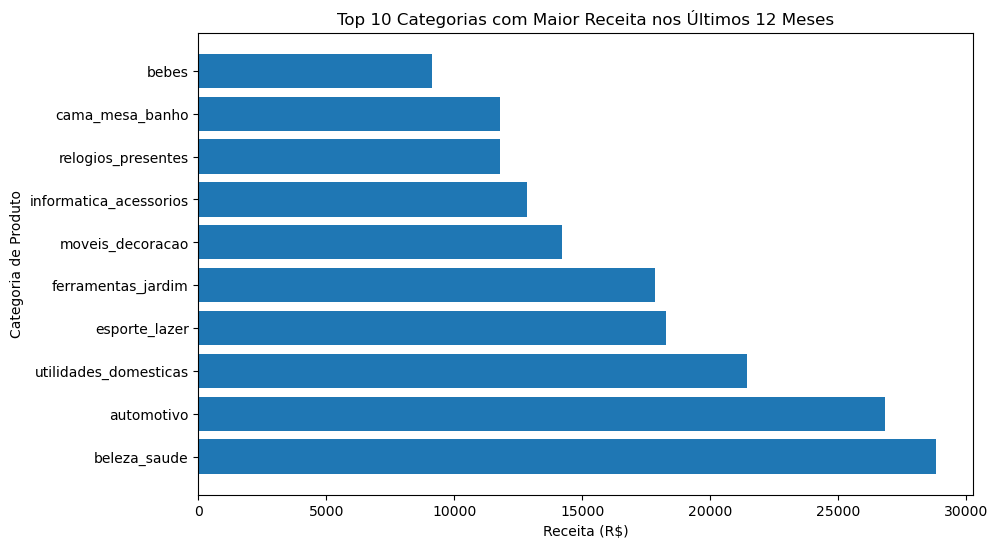

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['product_category_name'], df_top_10['price'])
plt.title('Top 10 Categorias com Maior Receita nos Últimos 12 Meses')
plt.xlabel('Receita (R$)')
plt.ylabel('Categoria de Produto')
plt.savefig('Top 10 Categorias com Melhor Receita nos Últimos 12 meses')
plt.show()

In [15]:
#10 PIORES CATEGORIAS DE ACORDO COM AS RECEITAS

In [16]:
# Passo 1: Calculando a receita de cada categoria nos últimos 12 meses
categoria = dados_ultimos_12_meses.groupby('product_category_name')['value'].sum()

# Passo 2: Ordenando as categorias com base em sua receita
categoria_por_receita_12_meses = categoria.sort_values()

# Passo 3: Selecionando as top 10 categorias com a maior receita
top_10_piores_categorias = categoria_por_receita_12_meses.head(10)

# Transformando a série em DataFrame e renomeando a coluna
df_last_10 = pd.DataFrame(top_10_piores_categorias).reset_index()
df_last_10.columns = ['product_category_name', 'price']

print(df_last_10)

            product_category_name   price
0                    dvds_blu_ray    8.90
1                          flores   30.00
2                 casa_conforto_2   34.99
3         fashion_roupa_masculina   40.00
4  fashion_underwear_e_moda_praia   59.90
5                    market_place  112.90
6                           audio  132.80
7               livros_importados  184.89
8                 fraldas_higiene  193.69
9                       cine_foto  199.69


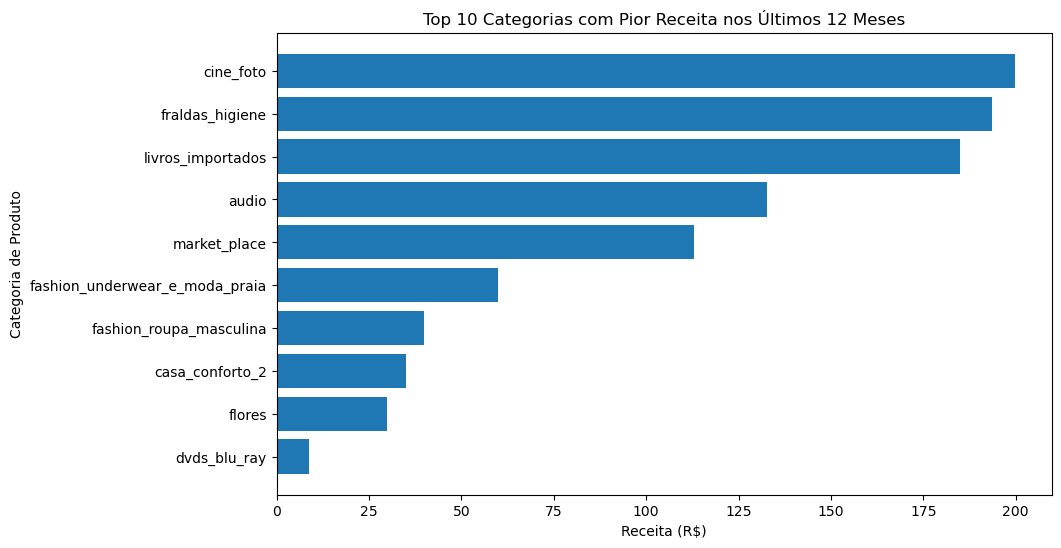

In [17]:

plt.figure(figsize=(10, 6))
plt.barh(df_last_10['product_category_name'], df_last_10['price'])
plt.title('Top 10 Categorias com Pior Receita nos Últimos 12 Meses')
plt.xlabel('Receita (R$)')
plt.ylabel('Categoria de Produto')
plt.savefig('Top 10 Categorias com Pior Receita nos Últimos 12 meses')
plt.show()